<a href="https://colab.research.google.com/github/simsekergun/EMcat/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import every module we will or we might need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import files
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import concatenate
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from keras.layers import LeakyReLU, PReLU
from tensorflow.keras.metrics import categorical_accuracy

In [ ]:
Y = pd.read_csv('https://raw.githubusercontent.com/simsekergun/EMcat/main/Y.csv',header=None)
X1 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/EMcat/main/X_Part1.csv',header=None)
X2 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/EMcat/main/X_Part2.csv',header=None)
X3 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/EMcat/main/X_Part3.csv',header=None)
X4 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/EMcat/main/X_Part4.csv',header=None)
X5 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/EMcat/main/X_Part5.csv',header=None)
X6 = pd.read_csv('https://raw.githubusercontent.com/simsekergun/EMcat/main/X_Part6.csv',header=None)

In [ ]:
X0 = pd.concat([X1, X2, X3, X4, X5, X6])

In [ ]:
# Let's convert numbers to categoricals
y = to_categorical(Y, num_classes=10)

In [ ]:
X0.head(3)

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,1.845112e-08,7.612102e-08,1.835012e-08,-1.325461e-07,-1.509302e-07,2.998953e-08,-7.005726e-08,-8.728849e-08,-4.029808e-08,2.223317e-08,...,3.949082e-08,4.536527e-08,-7.132091e-08,-8.693454e-08,2.656107e-08,-8.890755e-08,-1.875078e-08,7.706505e-08,4.254100e-08,-1.961011e-09
1,-1.920634e-07,-1.596596e-07,-1.241533e-07,-4.668908e-08,2.337568e-08,7.915675e-08,-6.490560e-08,-9.099994e-08,3.246807e-09,1.411399e-08,...,1.517864e-08,-2.264191e-08,-2.214072e-08,3.025483e-08,-5.374255e-09,2.834424e-09,3.142943e-08,3.198282e-08,-3.101574e-08,-4.140494e-08
2,3.839411e-08,1.681029e-08,3.286176e-08,-5.523513e-08,-1.824587e-07,-9.497230e-08,-6.959125e-08,1.022952e-07,1.235545e-07,1.178929e-07,...,2.580752e-08,-6.834297e-09,-4.177381e-08,-1.043456e-08,7.126842e-08,2.341647e-08,-5.799040e-08,-1.200556e-08,1.182830e-07,1.318516e-07


In [ ]:
# let's calculate the maximum value of |E|
normalizer  = X0.abs().max().max()
X = X0/normalizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
# let's check the shapes
X_train.shape, X_test.shape, y_train.shape

((30000, 132), (30000, 132), (30000, 10))

In [ ]:
# set the optimizer
opt = optimizers.Adam(learning_rate=0.001)

In [ ]:
# build a simple network
model = Sequential()
model.add(Dense(256, input_dim=132, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(256,  activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               34048     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 102410 (400.04 KB)
Trainable params: 102410 (400.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit the data
history = model.fit(X_train, y_train, verbose=1, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500
938/938 [==============================] - 12s 6ms/step - loss: 2.3286 - accuracy: 0.1034 - val_loss: 2.3024 - val_accuracy: 0.1151
Epoch 2/500
938/938 [==============================] - 6s 6ms/step - loss: 2.3021 - accuracy: 0.1086 - val_loss: 2.2988 - val_accuracy: 0.1110
Epoch 3/500
938/938 [==============================] - 5s 5ms/step - loss: 2.2757 - accuracy: 0.1178 - val_loss: 2.2560 - val_accuracy: 0.1446
Epoch 4/500
938/938 [==============================] - 6s 7ms/step - loss: 2.2436 - accuracy: 0.1447 - val_loss: 2.2299 - val_accuracy: 0.1576
Epoch 5/500
938/938 [==============================] - 5s 5ms/step - loss: 2.1940 - accuracy: 0.1875 - val_loss: 2.1358 - val_accuracy: 0.2180
Epoch 6/500
938/938 [==============================] - 6s 6ms/step - loss: 2.1228 - accuracy: 0.2289 - val_loss: 2.0475 - val_accuracy: 0.2768
Epoch 7/500
938/938 [==============================] - 5s 5ms/step - loss: 2.0483 - accuracy: 0.2688 - val_loss: 1.9681 - val_accuracy: 0.316

In [ ]:
# to have a more closer to comparison, let's get each prediction
y_pred = np.argmax(model.predict(X_test), axis=1)

938/938 [==============================] - 2s 2ms/step


In [ ]:
ytest = np.argmax(y_test, axis=1)
confusion_matrix(ytest, y_pred)

array([[2555,    8,   60,   38,   75,   45,   72,   21,   56,   26],
       [   2, 3168,   15,    8,   53,    9,   14,   10,   39,   11],
       [ 120,   20, 1844,  275,  250,   46,   70,  106,  147,   42],
       [  59,   17,  277, 2072,   86,  188,   16,   59,  218,   85],
       [  34,   26,  100,   29, 2201,   65,  177,   57,   35,  206],
       [  37,   17,   61,  216,   71, 2031,   76,   56,  137,   65],
       [  55,   22,   47,    3,  166,   94, 2570,    5,   53,    7],
       [  19,   28,   49,   26,  117,   27,   10, 2582,   63,  237],
       [  97,   56,  155,  146,  142,  136,  113,   95, 1658,  258],
       [  52,   12,   93,   74,  314,   48,   41,  228,  115, 2008]])

In [ ]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2956
           1       0.94      0.95      0.95      3329
           2       0.68      0.63      0.66      2920
           3       0.72      0.67      0.69      3077
           4       0.63      0.75      0.69      2930
           5       0.76      0.73      0.74      2767
           6       0.81      0.85      0.83      3022
           7       0.80      0.82      0.81      3158
           8       0.66      0.58      0.62      2856
           9       0.68      0.67      0.68      2985

    accuracy                           0.76     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.76      0.76      0.76     30000



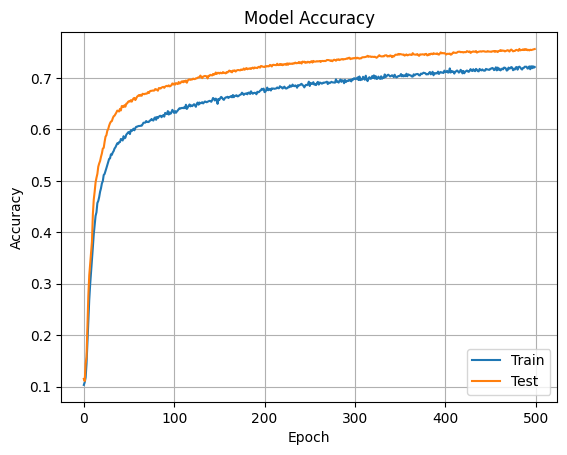

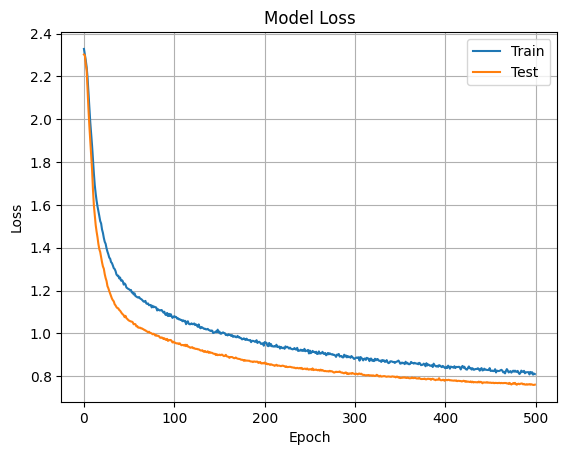

In [ ]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()